# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes.


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever).


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [32]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import pandas as pd

# Load the dataset (assuming the zip is already extracted and csv is in Colab)
data = pd.read_csv('Fraud.csv')

# Extract a sample of n=100,000 elements
sample_data = data.sample(n=100000, random_state=42)

In [34]:
# Display basic information and descriptive statistics
print(sample_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3737323 to 6142173
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB
None


In [35]:
print(sample_data.describe())

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean      243.709070  1.805811e+05   8.366804e+05    8.582234e+05   
std       142.518613  5.586699e+05   2.901104e+06    2.936799e+06   
min         1.000000  9.200000e-01   0.000000e+00    0.000000e+00   
25%       156.000000  1.350821e+04   0.000000e+00    0.000000e+00   
50%       240.000000  7.603086e+04   1.393850e+04    0.000000e+00   
75%       335.000000  2.091130e+05   1.070771e+05    1.464169e+05   
max       736.000000  3.697390e+07   3.359321e+07    3.388709e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.000000e+05    1.000000e+05  100000.000000   100000.000000  
mean     1.104193e+06    1.230055e+06       0.001410        0.000010  
std      3.223011e+06    3.475326e+06       0.037524        0.003162  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00  

In [36]:
''' following features could be important for predicting fraud:
Transaction Amount (amount): Fraudulent transactions often involve unusually high or low values.
Type of Transaction (type): Certain transaction types, like cash withdrawal, might be more prone to fraud.
Origin and Destination Balances (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest):
These balances can indicate if a transaction is suspicious.'''

' following features could be important for predicting fraud:\nTransaction Amount (amount): Fraudulent transactions often involve unusually high or low values.\nType of Transaction (type): Certain transaction types, like cash withdrawal, might be more prone to fraud.\nOrigin and Destination Balances (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest): \nThese balances can indicate if a transaction is suspicious.'

### What is the distribution of the outcome?

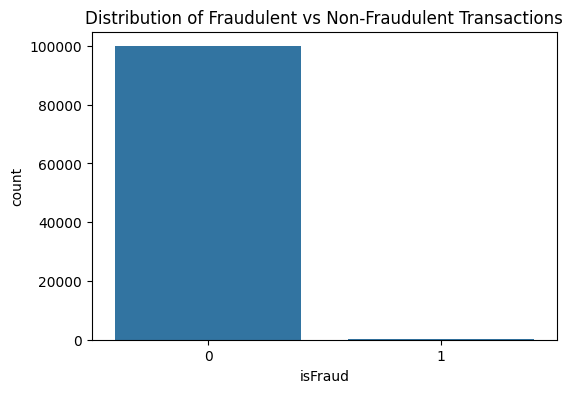

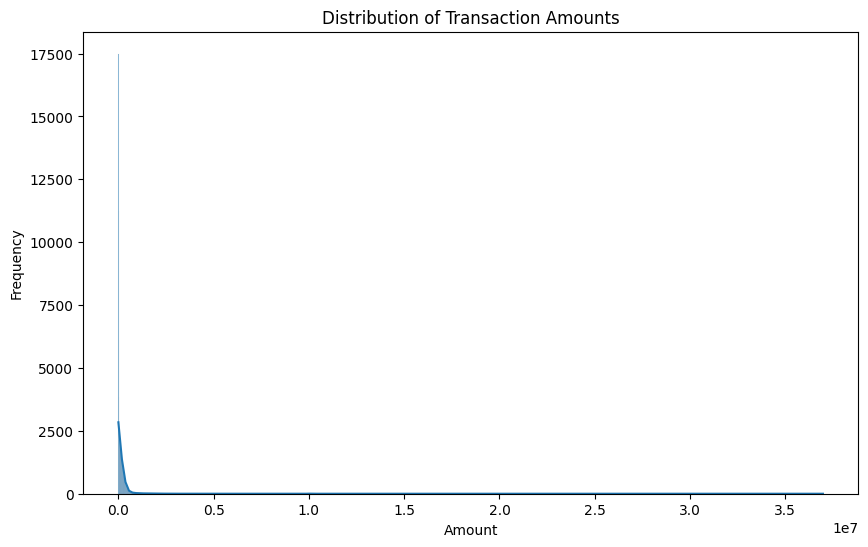

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable ('isFraud')
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=sample_data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Descriptive Statistics
# Example histogram for numerical features like 'amount'
plt.figure(figsize=(10, 6))
sns.histplot(sample_data['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Your response here
'''The distribution of the outcome variable (isFraud) is highly imbalanced:

Non-Fraudulent Transactions (0): The majority of the transactions are non-fraudulent, with almost all data points belonging to this class.
Fraudulent Transactions (1): A very small number of transactions are fraudulent, making it a minority class.'''

'The distribution of the outcome variable (isFraud) is highly imbalanced:\n\nNon-Fraudulent Transactions (0): The majority of the transactions are non-fraudulent, with almost all data points belonging to this class.\nFraudulent Transactions (1): A very small number of transactions are fraudulent, making it a minority class.'

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [39]:
# Your code here
# Check for missing values
missing_values = sample_data.isnull().sum()
print(missing_values[missing_values > 0])

# If there are any missing values, decide how to handle them
sample_data = sample_data.dropna()  # Dropping rows with missing values for simplicity



Series([], dtype: int64)


In [40]:
# Drop irrelevant columns, such as 'nameOrig' and 'nameDest', which are identifiers
sample_data = sample_data.drop(columns=['nameOrig', 'nameDest'])


In [41]:
# Convert 'type' to numeric using One-Hot Encoding
sample_data = pd.get_dummies(sample_data, columns=['type'], drop_first=True)


In [42]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
sample_data[numerical_cols] = scaler.fit_transform(sample_data[numerical_cols])


In [43]:
# Your code here
from imblearn.over_sampling import SMOTE

# Separate features and target
X = sample_data.drop(columns=['isFraud'])
y = sample_data['isFraud']

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [44]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [45]:
# Check the distribution of target after resampling
print("Distribution after resampling:")
print(y_resampled.value_counts())

# Print a few rows to verify
print(sample_data.head())


Distribution after resampling:
isFraud
0    99859
1    99859
Name: count, dtype: int64
         step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3737323   278  0.267847      -0.281210       -0.172685       -0.202226   
264914     15 -0.302388      -0.277934       -0.285857       -0.342598   
85647      10 -0.050687      -0.251661       -0.204091       -0.280140   
5899326   403  2.454376      -0.288402       -0.292232        0.649758   
2544263   206 -0.183309       0.718575        0.729124       -0.213581   

         newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
3737323       -0.318779        0               0          False       False   
264914        -0.353941        0               0          False       False   
85647         -0.339831        0               0          False       False   
5899326        1.012879        0               0          False       False   
2544263       -0.256785        0               0          False       Fal

### Run a logisitc regression classifier and evaluate its accuracy.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_test_pred = logistic_model.predict(X_test)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy and classification report
print("Accuracy Score:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Accuracy Score: 0.9756408972561587

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     19913
           1       0.99      0.96      0.98     20031

    accuracy                           0.98     39944
   macro avg       0.98      0.98      0.98     39944
weighted avg       0.98      0.98      0.98     39944



### Now pick a model of your choice and evaluate its accuracy.

In [49]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_rf_pred = rf_model.predict(X_test)

# Step 3: Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)

# Print the accuracy and classification report
print("Random Forest Classifier - Accuracy Score:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_rf_pred))


Random Forest Classifier - Accuracy Score: 0.9997246144602443

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19913
           1       1.00      1.00      1.00     20031

    accuracy                           1.00     39944
   macro avg       1.00      1.00      1.00     39944
weighted avg       1.00      1.00      1.00     39944



### Which model worked better and how do you know?

In [50]:
# Your response here
'''
Logistic Regression: 97.56%
Random Forest: 99.97%
Seems like rf is better than lr.
Random Forest Classifier performed significantly better, achieving almost perfect accuracy and F1-score.
Why It’s Better:
Random Forest, as an ensemble model, uses multiple decision trees to make decisions, capturing more complex relationships within the data, which is crucial for this type of problem.
High accuracy, precision, recall, and F1-score show that Random Forest is capable of distinguishing between fraudulent and non-fraudulent transactions almost perfectly.
Based on these metrics, Random Forest Classifier clearly outperformed Logistic Regression in terms of overall performance.
'''

'\nLogistic Regression: 97.56%\nRandom Forest: 99.97%\nSeems like rf is better than lr.\nRandom Forest Classifier performed significantly better, achieving almost perfect accuracy and F1-score.\nWhy It’s Better:\nRandom Forest, as an ensemble model, uses multiple decision trees to make decisions, capturing more complex relationships within the data, which is crucial for this type of problem.\nHigh accuracy, precision, recall, and F1-score show that Random Forest is capable of distinguishing between fraudulent and non-fraudulent transactions almost perfectly.\nBased on these metrics, Random Forest Classifier clearly outperformed Logistic Regression in terms of overall performance.\n'

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.